In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aspillai/tesla-stock-price-with-indicators-10-years")

print("Path to dataset files:", path)

100%|██████████| 329k/329k [00:00<00:00, 504kB/s]

Extracting files...
Path to dataset files: C:\Users\naman\.cache\kagglehub\datasets\aspillai\tesla-stock-price-with-indicators-10-years\versions\1


In [8]:
#import all the required libraries.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
#create the initial dataframe and print a preview of the dataset
import os
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [16]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           251

In [12]:
import pandas as pd

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Generate summary statistics for all variables
summary_stats = df.describe(include='all').T  # 'include=all' ensures all columns (numeric and non-numeric) are included

# Format the output for better readability
print("Summary Statistics of the Entire Dataset:")
print("-" * 50)
print(summary_stats.round(2))  # Round to 2 decimal places for cleaner output

Summary Statistics of the Entire Dataset:
--------------------------------------------------
                 count unique         top freq             mean  \
date              2339   2339  2014-01-02    1              NaN   
open            2339.0    NaN         NaN  NaN        96.949139   
high            2339.0    NaN         NaN  NaN        98.999511   
low             2339.0    NaN         NaN  NaN        94.733554   
close           2339.0    NaN         NaN  NaN        96.898539   
volume          2339.0    NaN         NaN  NaN  97518914.023087   
rsi_7           2339.0    NaN         NaN  NaN        52.697442   
rsi_14          2339.0    NaN         NaN  NaN        52.471789   
cci_7           2339.0    NaN         NaN  NaN         8.638706   
cci_14          2339.0    NaN         NaN  NaN        11.229188   
sma_50          2339.0    NaN         NaN  NaN        95.158235   
ema_50          2339.0    NaN         NaN  NaN        95.115422   
sma_100         2339.0    NaN       

In [19]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [23]:
#Normalizing columns to avoid scaling issues
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)
df_normalized = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

Numeric columns: Index(['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'cci_7',
       'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger',
       'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')


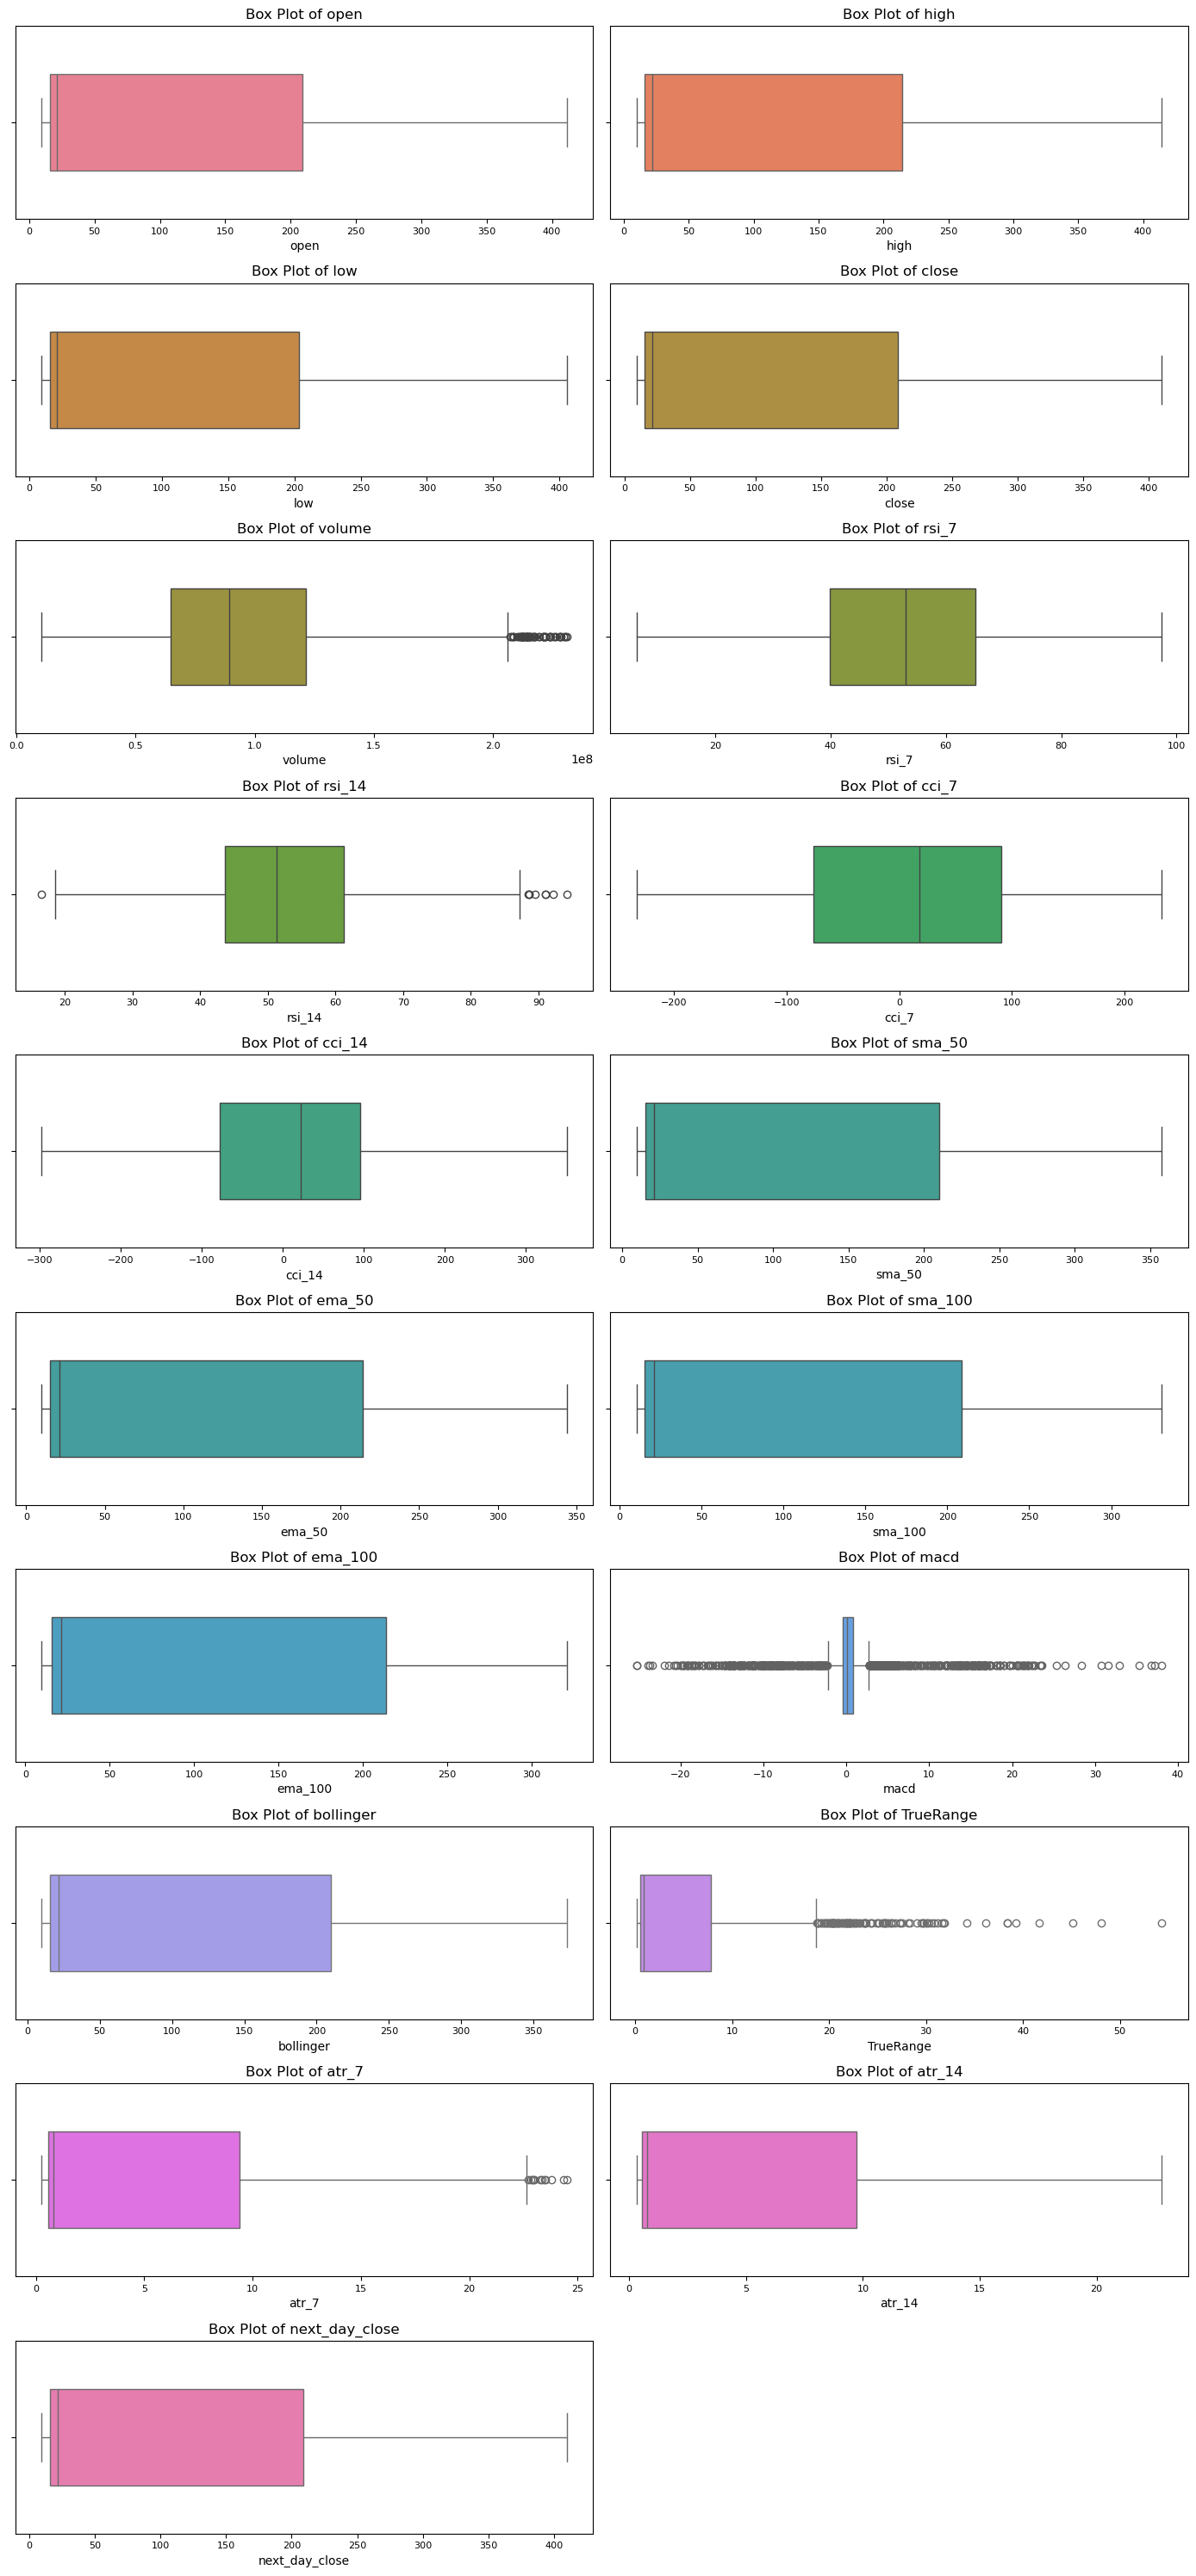

In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Select all variables except 'date'
variables = [col for col in df.columns if col != 'date']  # ['open', 'high', 'low', 'close', 'volume', 'sma_50', 'rsi_14', 'macd']

# Define a color palette with distinct colors for each variable
colors = sb.color_palette("husl", n_colors=len(variables))  # Distinct colors for 8 variables

# Set up the figure with subplots: 2 plots per row
n_vars = len(variables)  # 8 variables
n_cols = 2  # 2 box plots per row
n_rows = (n_vars + 1) // 2  # Ceiling division: 8 -> 4 rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3), squeeze=False)
axes = axes.flatten()  # Flatten for easy indexing

# Generate horizontal box plots for each variable with different colors
for i, var in enumerate(variables):
    sb.boxplot(x=df[var], ax=axes[i], color=colors[i], width=0.5, orient='h')  # Horizontal with x=
    axes[i].set_title(f'Box Plot of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)  # xlabel for horizontal orientation
    axes[i].tick_params(axis='x', labelsize=8)

# Hide any unused subplots (if n_vars is odd)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

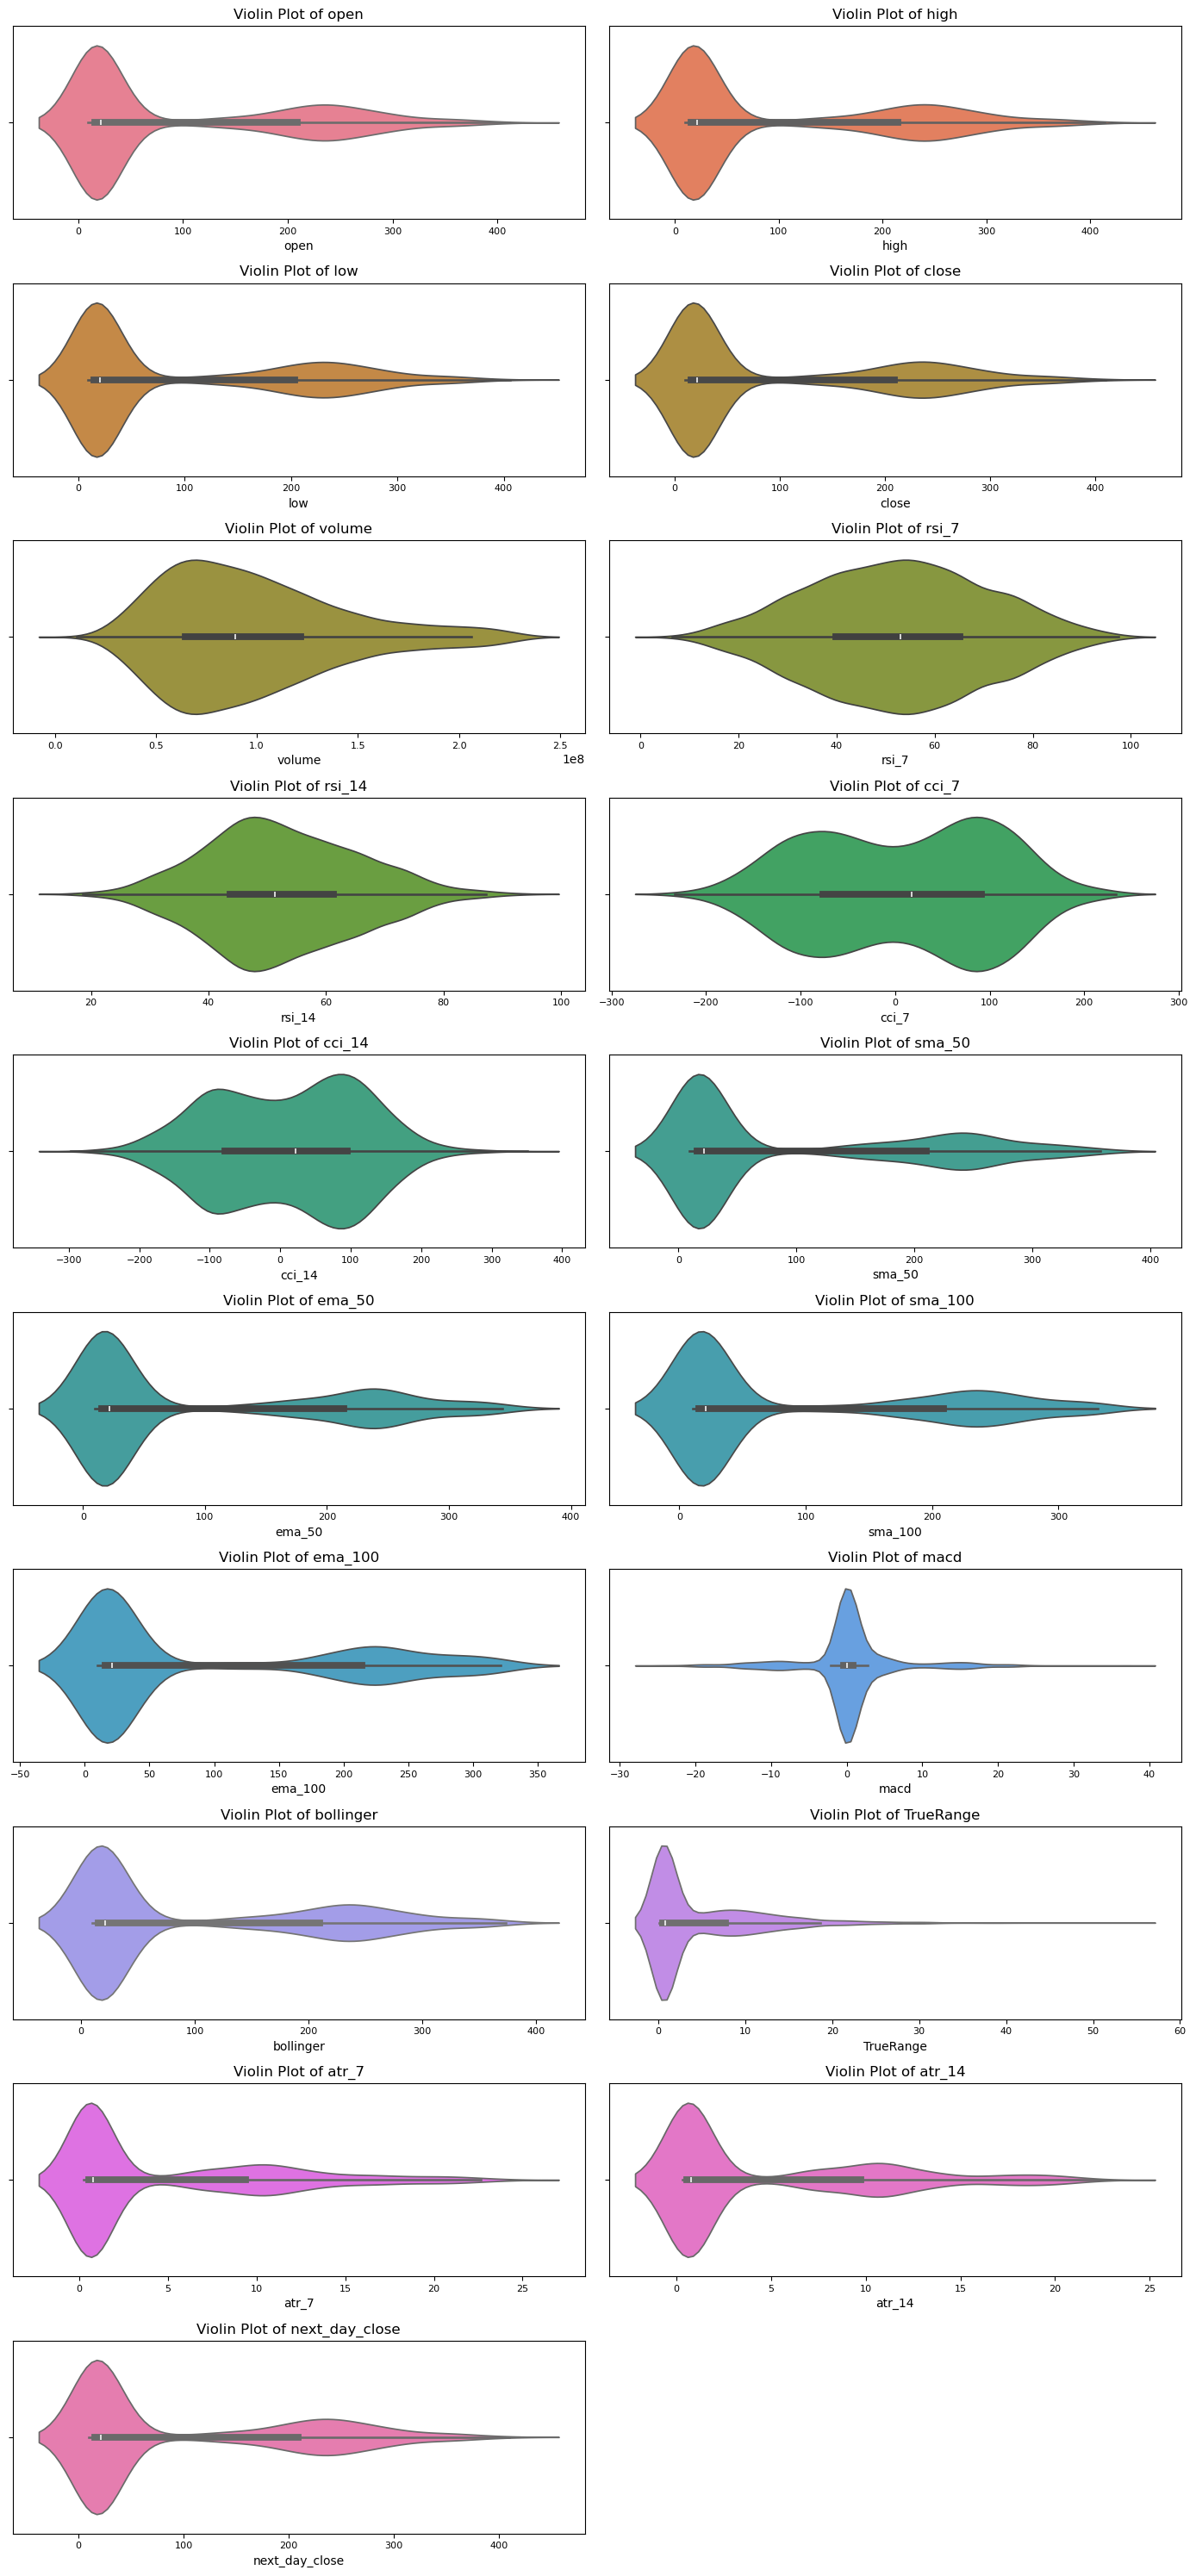

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Select all variables except 'date'
variables = [col for col in df.columns if col != 'date']  # ['open', 'high', 'low', 'close', 'volume', 'sma_50', 'rsi_14', 'macd']

# Define a color palette with distinct colors for each variable
colors = sb.color_palette("husl", n_colors=len(variables))  # Distinct colors for 8 variables

# Set up the figure with subplots: 2 plots per row
n_vars = len(variables)  # 8 variables
n_cols = 2  # 2 violin plots per row
n_rows = (n_vars + 1) // 2  # Ceiling division: 8 -> 4 rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3), squeeze=False)
axes = axes.flatten()  # Flatten for easy indexing

# Generate horizontal violin plots for each variable with different colors
for i, var in enumerate(variables):
    sb.violinplot(x=df[var], ax=axes[i], color=colors[i], orient='h')  # Horizontal with x=
    axes[i].set_title(f'Violin Plot of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)  # xlabel for horizontal orientation
    axes[i].tick_params(axis='x', labelsize=8)

# Hide any unused subplots (if n_vars is odd)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

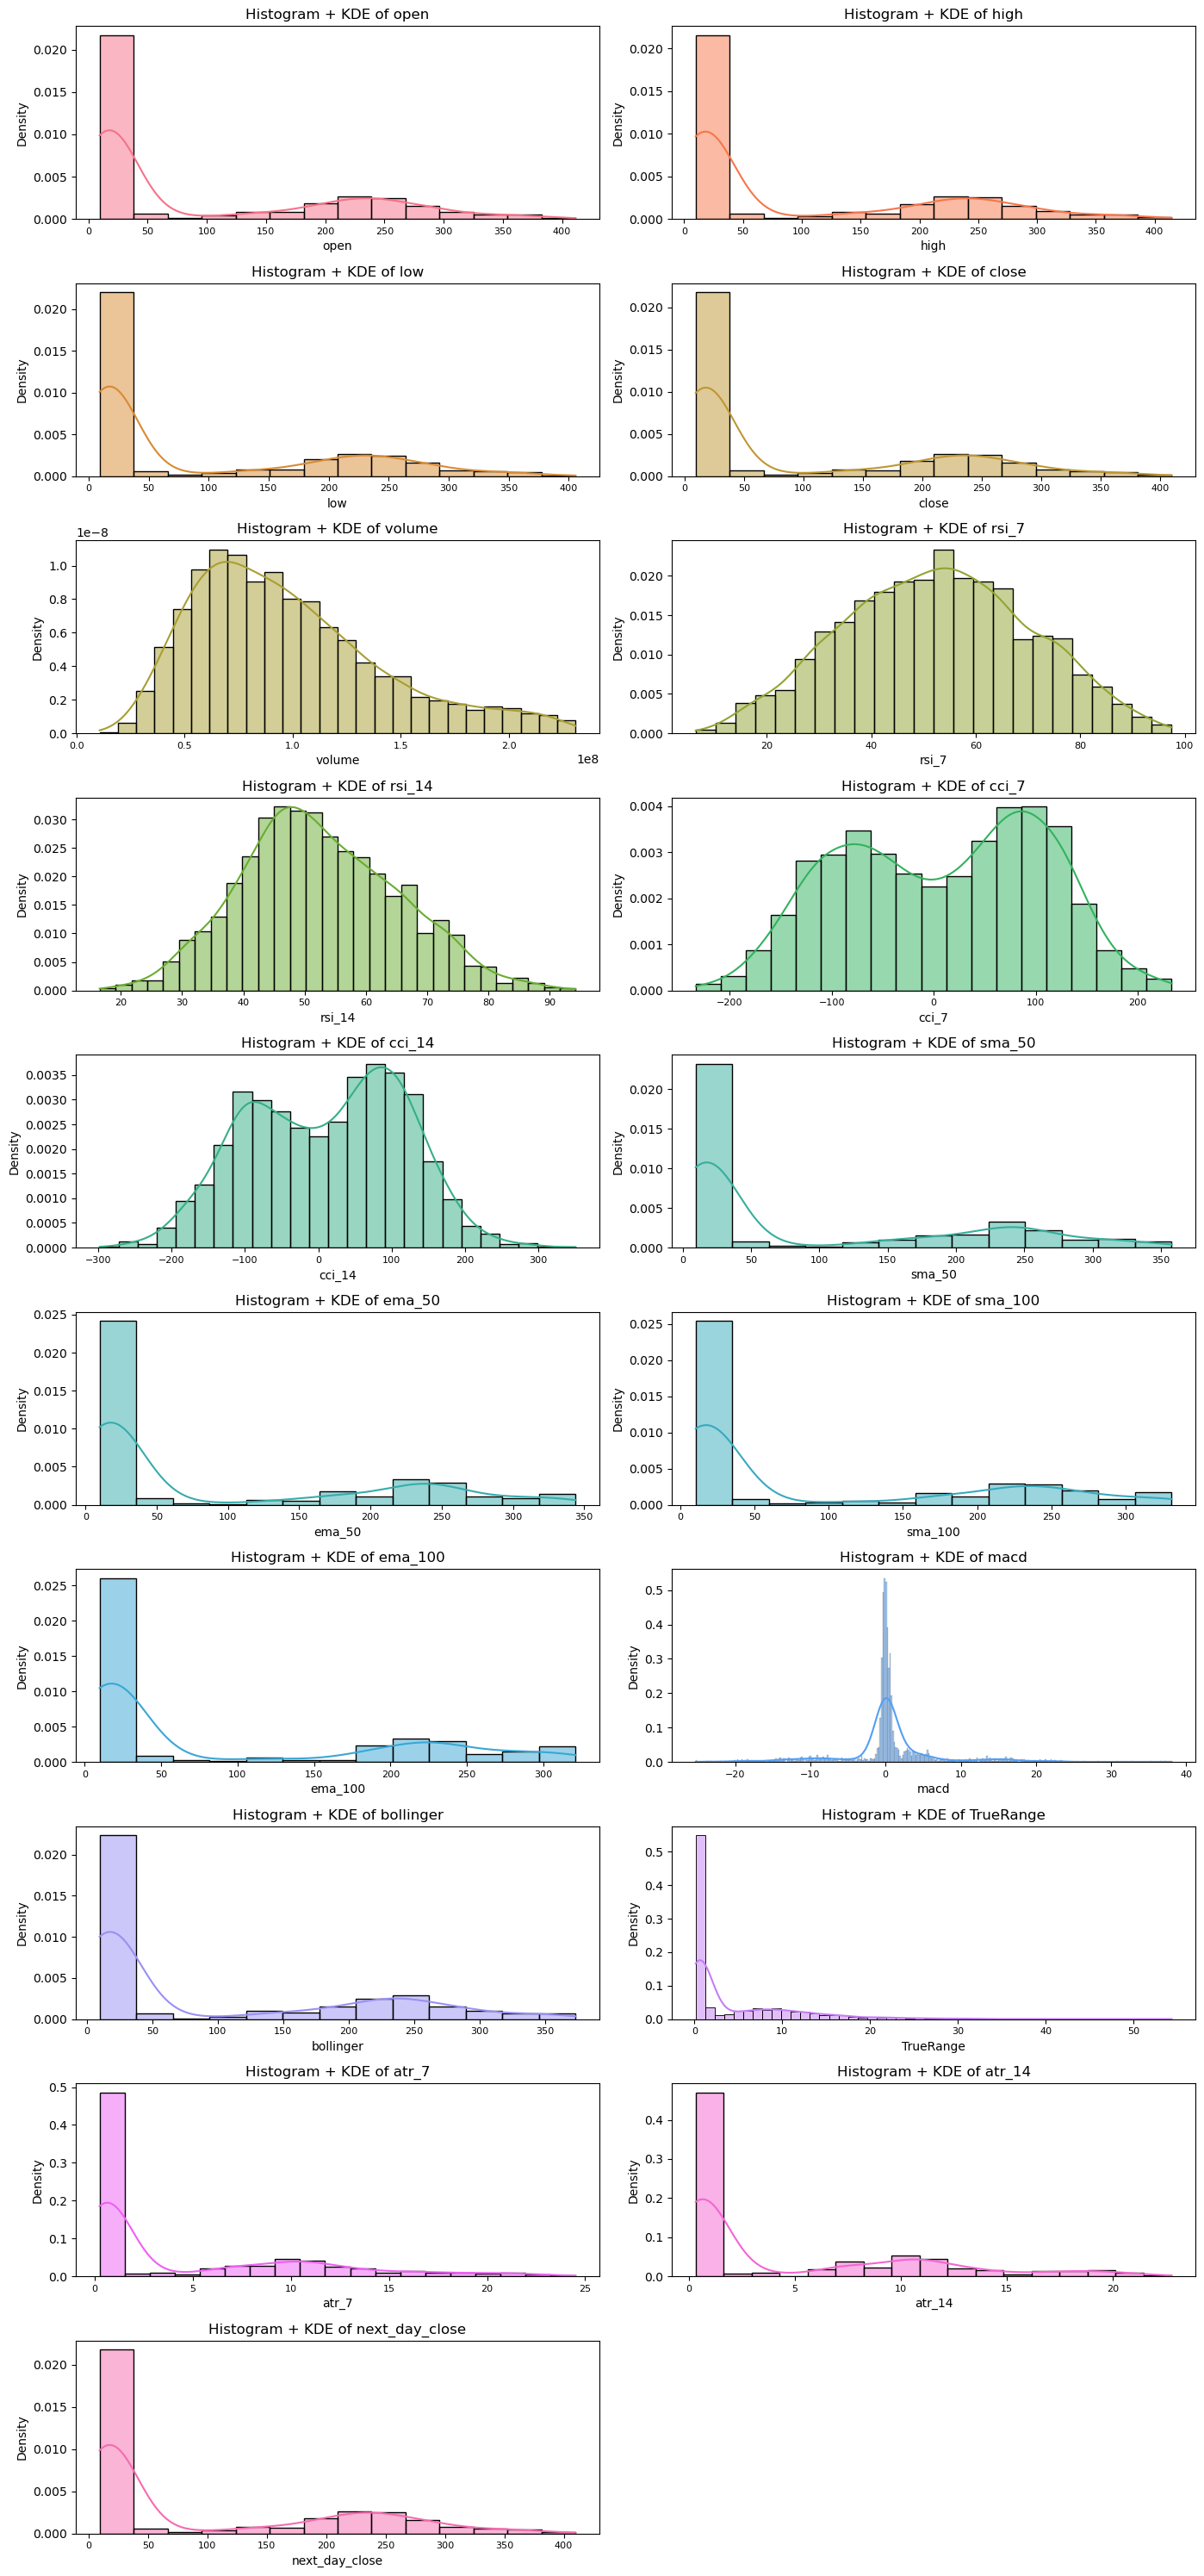

In [7]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Select all variables except 'date'
variables = [col for col in df.columns if col != 'date']  # ['open', 'high', 'low', 'close', 'volume', 'sma_50', 'rsi_14', 'macd']

# Define a color palette with distinct colors for each variable
colors = sb.color_palette("husl", n_colors=len(variables))  # Distinct colors for 8 variables

# Set up the figure with subplots: 2 plots per row
n_vars = len(variables)  # 8 variables
n_cols = 2  # 2 plots per row
n_rows = (n_vars + 1) // 2  # Ceiling division: 8 -> 4 rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3), squeeze=False)
axes = axes.flatten()  # Flatten for easy indexing

# Generate horizontal histogram + KDE plots for each variable with different colors
for i, var in enumerate(variables):
    sb.histplot(x=df[var], ax=axes[i], color=colors[i], kde=True, stat='density')  # Horizontal with x=, KDE overlay
    axes[i].set_title(f'Histogram + KDE of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)  # xlabel for horizontal orientation
    axes[i].tick_params(axis='x', labelsize=8)

# Hide any unused subplots (if n_vars is odd)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

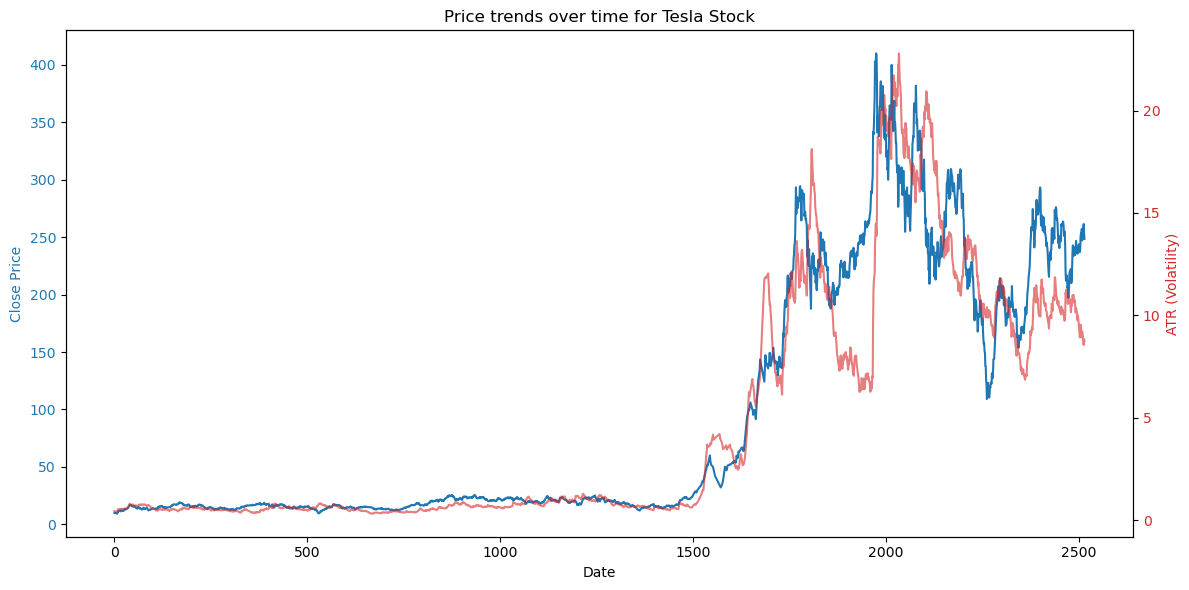

In [37]:
# Plotting Price trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the price (closing price) on the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')

# Update with the correct column name (e.g., 'close')
ax1.plot(df['close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot ATR
ax2 = ax1.twinx()
ax2.set_ylabel('ATR (Volatility)', color='tab:red')

# Assuming 'atr_14' exists in the data
ax2.plot(df['atr_14'], color='tab:red', label='ATR 14', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and show the plot
plt.title('Price trends over time for Tesla Stock')
plt.tight_layout()
plt.show()

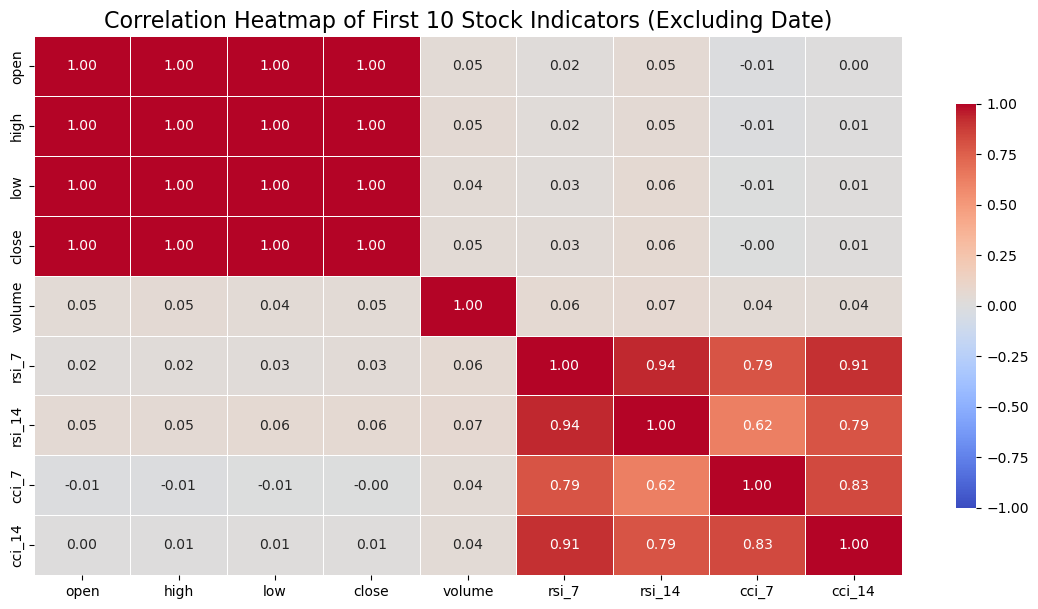

In [28]:
#Correlation heatmap of first 10 variables.

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Select the first 10 variables (or all if fewer), excluding 'date' for correlation
all_columns = df.columns.tolist()[:10]  # Take first 10 (or all if <10)
indicators = [col for col in all_columns if col != 'date']  # Exclude 'date'
# Result: ['open', 'high', 'low', 'close', 'volume', 'sma_50', 'rsi_14', 'macd'] (8 variables)

# Calculate the correlation matrix for the selected indicators
correlation_matrix = df[indicators].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(14, 7))  # Adjust size as needed

# Generate the correlation heatmap
sb.heatmap(correlation_matrix, 
           annot=True,            # Show correlation values in cells
           cmap='coolwarm',       # Color scheme: blue (negative) to red (positive)
           vmin=-1, vmax=1,       # Range of correlation values
           center=0,              # Center the colormap at 0
           fmt='.2f',             # Format annotations to 2 decimal places
           linewidths=0.5,        # Width of lines between cells
           cbar_kws={'shrink': 0.75})  # Customize color bar size

# Add title
plt.title('Correlation Heatmap of First 10 Stock Indicators (Excluding Date)', fontsize=16)

# Display the heatmap
plt.show()

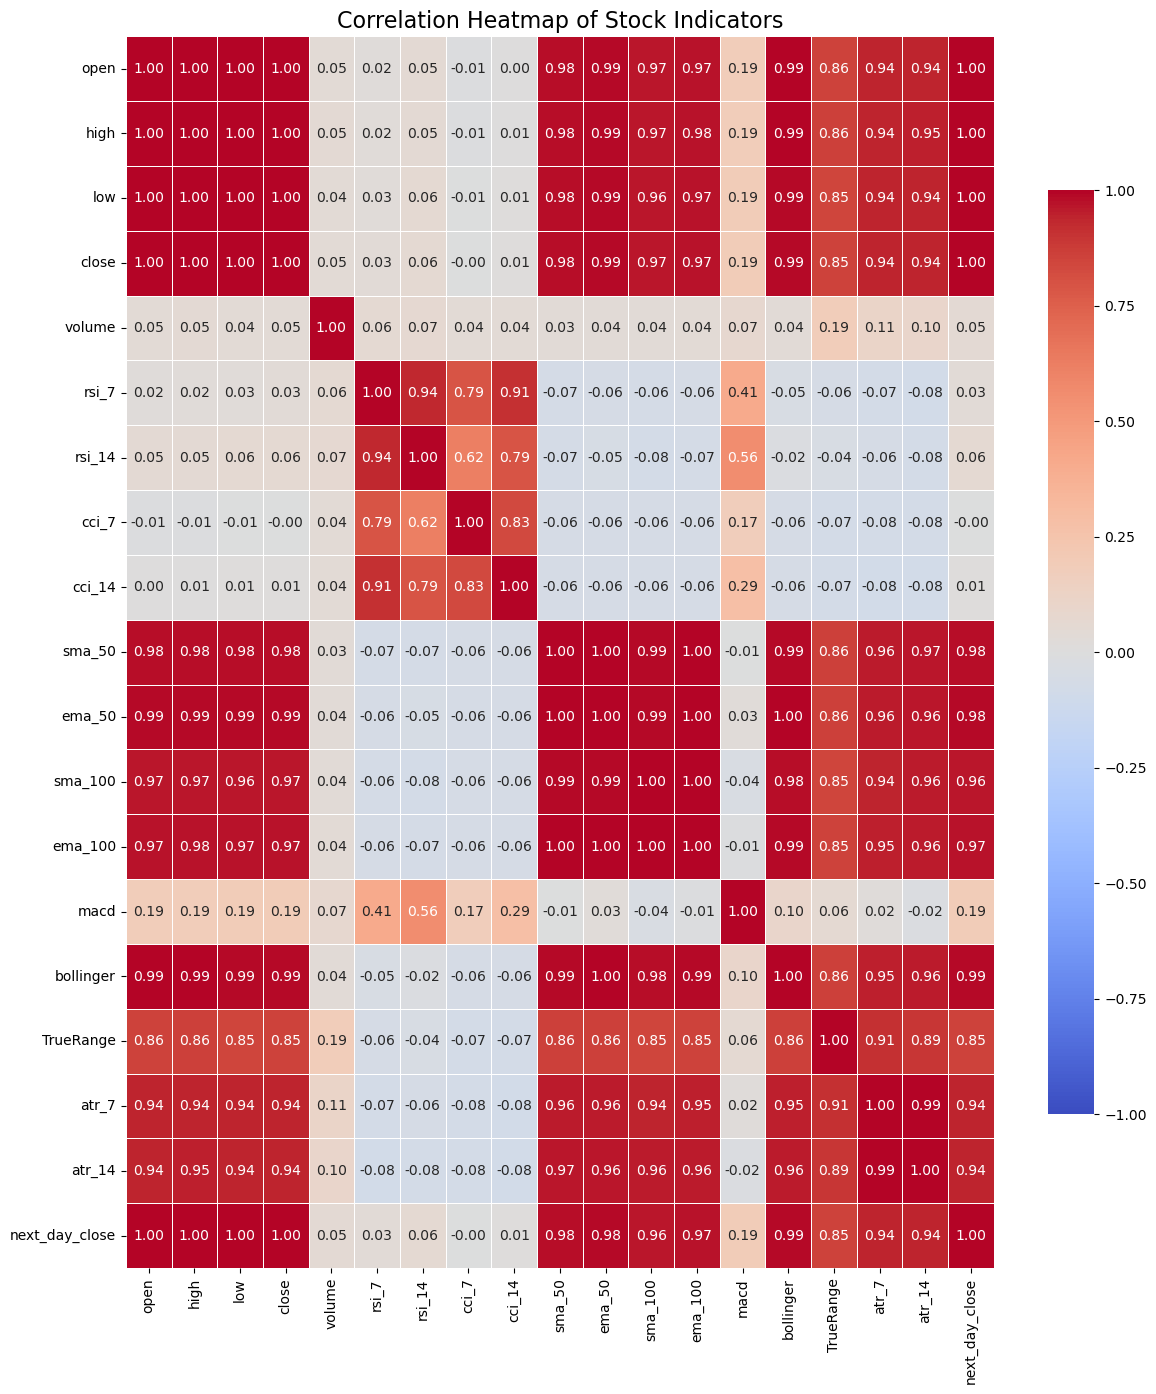

In [36]:
#Correlation heatmap of all variables

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset (adjust path as needed)
df = pd.read_csv(r"C:\Users\naman\Downloads\tsla_2014_2023.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Function to remove outliers (from your original code)
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to relevant numeric columns
outlier_columns = ['open', 'high', 'low', 'close', 'volume']
df = remove_outliers(df, outlier_columns)

# Select all numeric stock indicators (exclude 'date')
indicators = [col for col in df.columns if col != 'date']  # ['open', 'high', 'low', 'close', 'volume', 'sma_50', 'rsi_14', 'macd']

# Calculate the correlation matrix for the selected indicators
correlation_matrix = df[indicators].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(14, 16))  # Adjust size as needed

# Generate the correlation heatmap
sb.heatmap(correlation_matrix, 
           annot=True,            # Show correlation values in cells
           cmap='coolwarm',       # Color scheme: blue (negative) to red (positive)
           vmin=-1, vmax=1,       # Range of correlation values
           center=0,              # Center the colormap at 0
           fmt='.2f',             # Format annotations to 2 decimal places
           linewidths=0.5,        # Width of lines between cells
           cbar_kws={'shrink': 0.75})  # Customize color bar size

# Add title
plt.title('Correlation Heatmap of Stock Indicators', fontsize=16)

# Display the heatmap
plt.show()